In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
dataset = pd.read_csv("C:\\Users\\MOSES\\Documents\\archive (2)\\insurance.csv")

In [3]:
# COnverting the dataset into dataframe
dataframe = pd.DataFrame(dataset)
# Checkng if there are nuul values in the dataset
dataframe.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
# Chexking some key information about the dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Printing the first 5 elements of the dataset
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Checking the number of rows and columns in the dataset
dataframe.shape

(1338, 7)

In [7]:
# Checking the statistical information values of the dataset
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


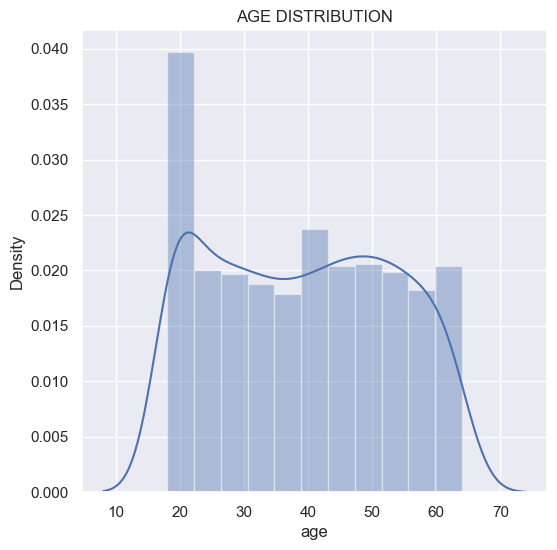

In [8]:
# Checking how the age is distributed in the dataset
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataframe.age)
plt.title("AGE DISTRIBUTION")
plt.show()

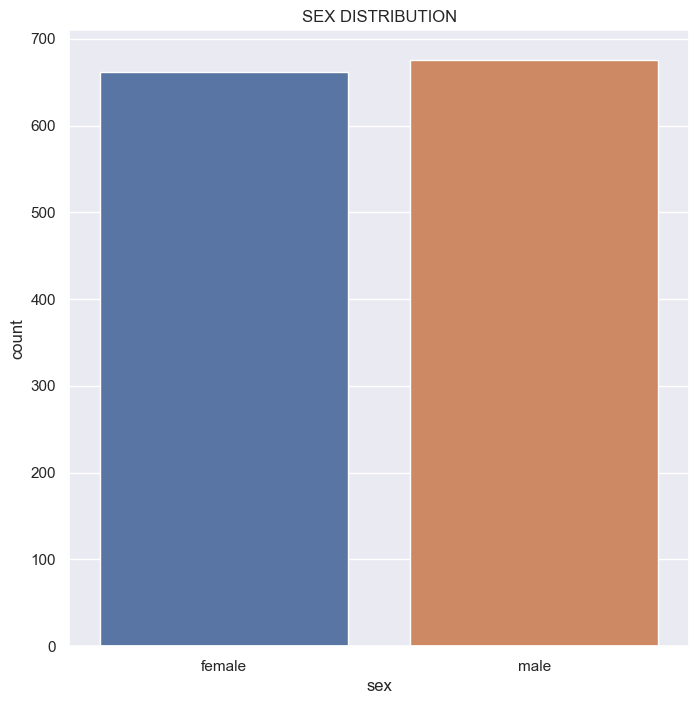

In [9]:
# Checking how the sex is distributed in the dataset
sns.set()
plt.figure(figsize=(8,8))
sns.countplot(x="sex", data = dataframe)
plt.title("SEX DISTRIBUTION")
plt.show()

In [10]:
print(dataframe.sex.value_counts())

sex
male      676
female    662
Name: count, dtype: int64


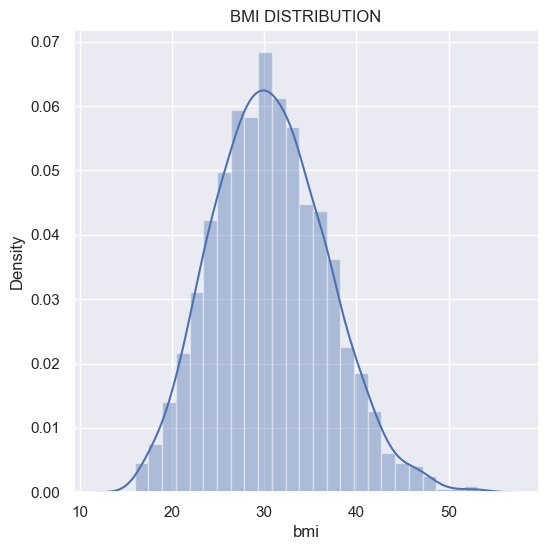

In [11]:
# Checking how the bmi is distributed in the dataset
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataframe.bmi)
plt.title("BMI DISTRIBUTION")
plt.show()

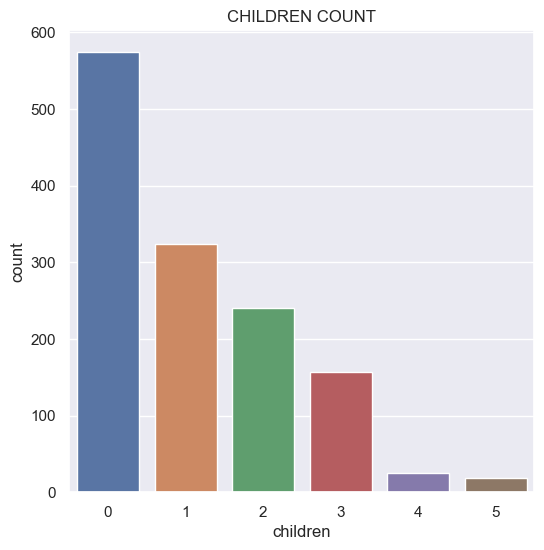

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x="children", data = dataframe)
plt.title("CHILDREN COUNT")
plt.show()

In [13]:
# Checking the actual value of people and their children
dataframe.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

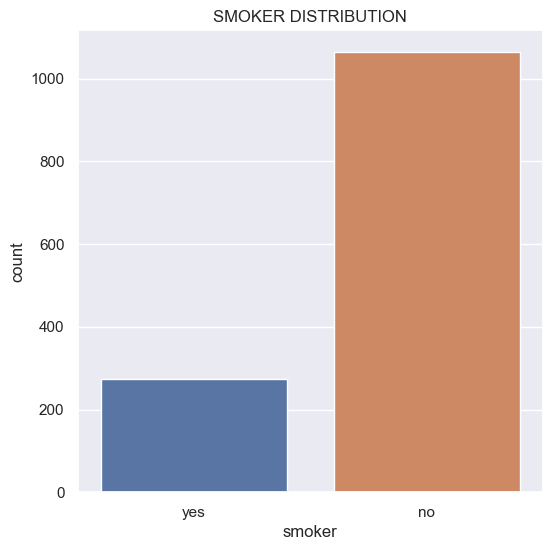

In [14]:
# Checking the smoker distribution in the dataset
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x="smoker", data = dataframe)
plt.title("SMOKER DISTRIBUTION")
plt.show()

In [15]:
# Getting the actual number of smoker in the dataset
dataframe.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [16]:
dataframe.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

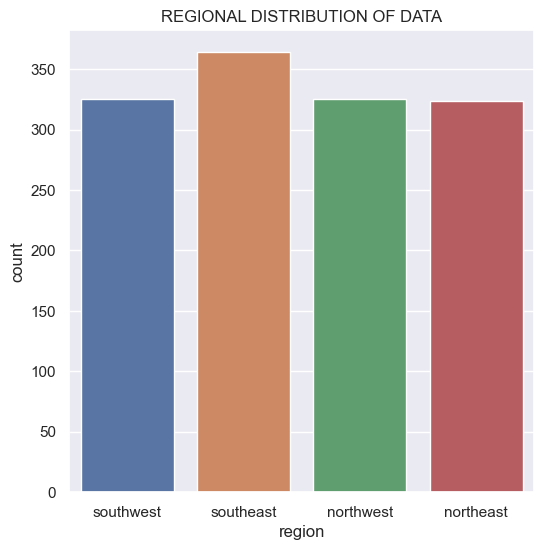

In [17]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x="region", data = dataframe)
plt.title("REGIONAL DISTRIBUTION OF DATA")
plt.show()

In [18]:
dataframe.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

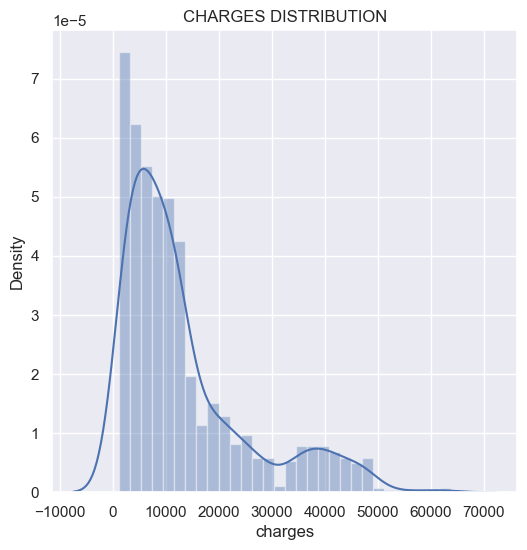

In [19]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataframe.charges)
plt.title("CHARGES DISTRIBUTION")
plt.show()

In [20]:
# Encoding categpries into values using replace
dataframe.replace({"sex":{"male":0,"female":1}},inplace=True)
dataframe.replace({"smoker":{"yes":0,"no":1}},inplace=True)
dataframe.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace=True)

In [21]:
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [22]:
# Splitting the data into features(x) and targets(y)
x = dataframe.drop(columns="charges", axis = 1)
y = dataframe.charges

In [23]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [25]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
# Prediction on treaining data
training_prediction = model.predict(x_train)

In [27]:
training_data_accuracy = metrics.r2_score(y_train,training_prediction)
print("R squared value:", training_data_accuracy)

R squared value: 0.751505643411174


In [28]:
# Prediction on test data
testing_data_prediction = model.predict(x_test)

# Accuracy on test data
testing_data_accuracy = metrics.r2_score(y_test,testing_data_prediction)
print("R squared value:", testing_data_accuracy)

R squared value: 0.7447273869684077


### Building the Medical Insurance cost prediction system

In [30]:
input_data = (30,1,32.4,1,1,1,)

input_data_array = np.asarray(input_data)
input_data_array_reshaped = input_data_array.reshape(1,-1)
cost_prediction = model.predict(input_data_array_reshaped)
print("Predicted medical insurance cost is USD: ",cost_prediction[0])


Predicted medical insurance cost is USD:  6503.277099426798
